In [1]:
import matplotlib.pyplot as plt
import seaborn
from WholeBrain.Utils.p_values import plotComparisonAcrossLabels2

In [2]:
from ignition_common import *

************************* Subjects Info *************************
ID              FMRI_TR (ms)    TYPE                           VOLUME (cm³)    # REGIONS WITH TUMOR
sub-CON01       2100.0          none                           0.0             0              
sub-CON02       2100.0          none                           0.0             0              
sub-CON03       2100.0          none                           0.0             0              
sub-CON04       2100.0          none                           0.0             0              
sub-CON05       2400.0          none                           0.0             0              
sub-CON06       2400.0          none                           0.0             0              
sub-CON07       2400.0          none                           0.0             0              
sub-CON08       2400.0          none                           0.0             0              
sub-CON09       2400.0          none                           0.0        

Delta Ignition vs Tumor Connectivity Strength

## TODO: Maybe will be better to do this analysis but with the control subject mean SC. Like trying to see what happens to the delta ignition on regions that on the "normal" case would be strongly connected with a tumor region. Use the mean SC cause on tumor patients white matter gets affected.

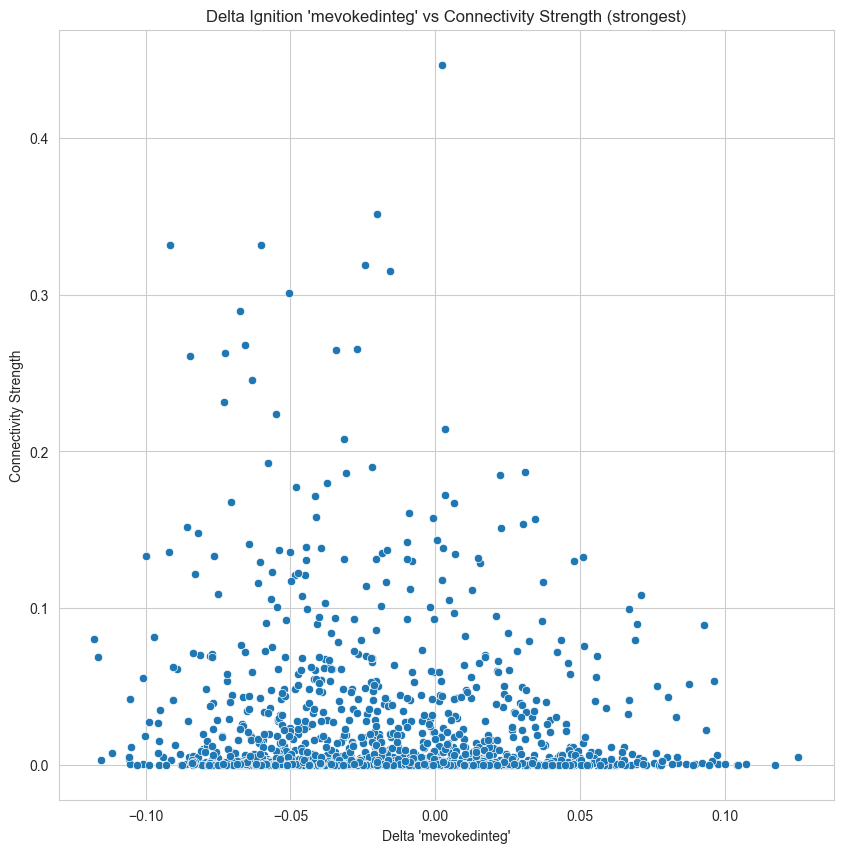

In [3]:
delta_ignition_vs_conn = []

for k, s in tumor_subset.items():
    # Patient 10 has tumor but is not in any region of the parcellation
    if s.count_tumor_regions() > 0:
        for i in range(68):
            strengths = []
            # For each non tumor region, get the strongest connectivity with a tumor region
            if not s.tumor_regions.is_tumor_region_by_id(i):
                for j in range(68):
                    if s.tumor_regions.is_tumor_region_by_id(j):
                        strengths.append(s.preop_data.sc_dk68.weights[i][j])
                strengths.sort(reverse=True)

                # Add the strongest connection to the comparison
                delta_ignition_vs_conn.append((
                    tumor_subjects_delta_ignitions[k][i]['mevokedinteg'],
                    strengths[0]
                ))

plt.figure(figsize=(10, 10))
seaborn.scatterplot(
    x = [v[0] for v in delta_ignition_vs_conn],
    y = [v[1] for v in delta_ignition_vs_conn]
)
plt.xlabel("Delta 'mevokedinteg'")
plt.ylabel("Connectivity Strength")
plt.title("Delta Ignition 'mevokedinteg' vs Connectivity Strength (strongest)")
plt.show()


Taking the above picture, we want to try to compare the connectivity strength (strongest) between regions with positive delta ignition and between negative delta ignitions.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Positive delta ignition (#459) vs. Negative delta ignition (#1047): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:8.334e-01 U_stat=2.419e+05


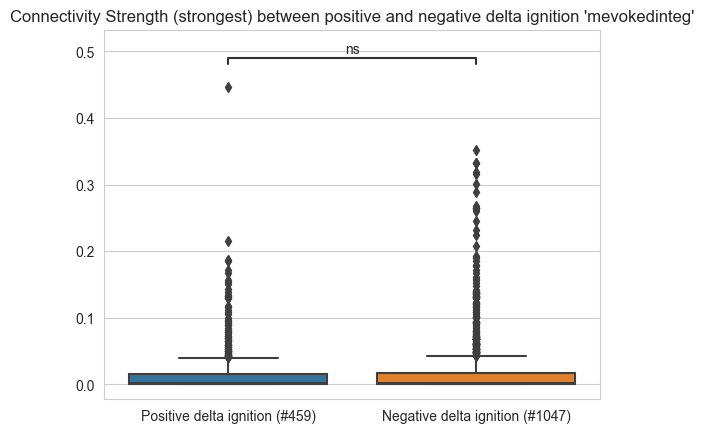

In [4]:
if True:
    positive_delta_ignition = [v[1] for v in delta_ignition_vs_conn if v[0] >= 0.0]
    negative_delta_ignition = [v[1] for v in delta_ignition_vs_conn if v[0] < 0.0]
    plotComparisonAcrossLabels2(
        {
            'Positive delta ignition (#'+str(len(positive_delta_ignition))+')': positive_delta_ignition,
            'Negative delta ignition (#'+str(len(negative_delta_ignition))+')': negative_delta_ignition
        },
        graphLabel="Connectivity Strength (strongest) between positive and negative delta ignition 'mevokedinteg'"
    )

Now we try to compare delta ignition 'mevokedinteg' seperated by max connectivity strength.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Max Connectivity >= (#83) vs. Max Connectivity < (#1423): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:1.835e-02 U_stat=4.997e+04


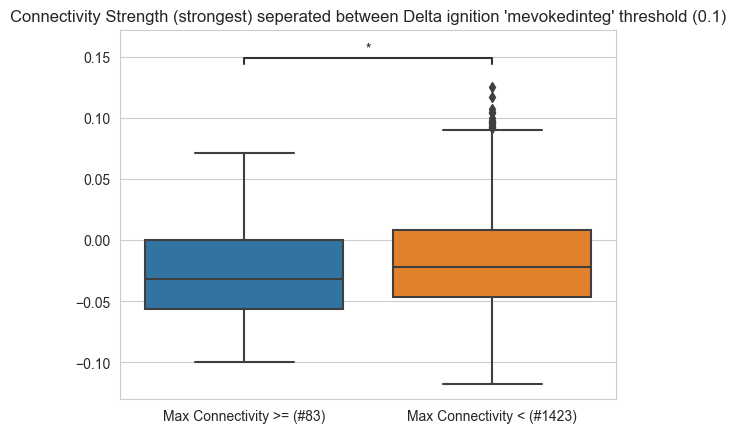

In [5]:
if True:
    max_connectivity_threshold = 0.1

    max_connectivity_bigger_th = [v[0] for v in delta_ignition_vs_conn if v[1] >= max_connectivity_threshold]
    max_connectivity_smaller_th = [v[0] for v in delta_ignition_vs_conn if v[1] < max_connectivity_threshold]

    plotComparisonAcrossLabels2(
        {
            'Max Connectivity >= (#'+str(len(max_connectivity_bigger_th))+')': max_connectivity_bigger_th,
            'Max Connectivity < (#'+str(len(max_connectivity_smaller_th))+')': max_connectivity_smaller_th
        },
        graphLabel="Connectivity Strength (strongest) seperated between Delta ignition 'mevokedinteg' threshold ("+str(max_connectivity_threshold)+')'
    )

And if we compare the most connected with the least connected?

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Max Connectivity > 0.1 (#83) vs. Max Connectivity < 0.0001 (#326): Mann-Whitney-Wilcoxon test two-sided with Benjamini-Hochberg correction, P_val:6.341e-03 U_stat=1.090e+04


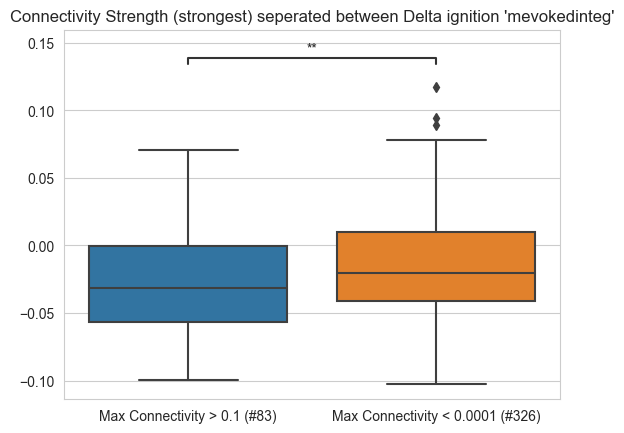

In [6]:
if True:
    # Greater and lower threshold
    max_connectivity_g_threshold = 0.1
    max_connectivity_l_threshold = 0.0001

    max_connectivity_g_th = [v[0] for v in delta_ignition_vs_conn if v[1] > max_connectivity_g_threshold]
    max_connectivity_l_th = [v[0] for v in delta_ignition_vs_conn if v[1] < max_connectivity_l_threshold]

    plotComparisonAcrossLabels2(
        {
            'Max Connectivity > ' + str(max_connectivity_g_threshold) + ' (#'+str(len(max_connectivity_g_th))+')': max_connectivity_g_th,
            'Max Connectivity < ' + str(max_connectivity_l_threshold) + ' (#'+str(len(max_connectivity_l_th))+')': max_connectivity_l_th
        },
        graphLabel="Connectivity Strength (strongest) seperated between Delta ignition 'mevokedinteg'"
    )